# Step 1 紛絲頁資訊

In [242]:
%matplotlib inline

import pyes
import json
import pandas as pd
import seaborn as sns
#192.168.1.107
def fanpage(fids,host):
    for fid in fids:
        conn = pyes.es.ES(host)
        #bq = pyes.query.BoolQuery()
        tq = pyes.query.TermQuery(field="fid", value=fid)
        qsearch = pyes.query.Search(tq) 
        result = conn.search(query=qsearch , indices='facebook_nested' , doc_types='fanpage')
        print 'fid',fid
        for i in result:
            print 'fid fans',i['likes_count'],'\n'

In [243]:
def fiddate(fids,host):
    for fid in fids:
        conn = pyes.es.ES(host)
        tq = pyes.query.TermQuery(field="fid", value=fid)
        DHAgg = pyes.aggs.DateHistogramAgg('month' ,field='created_time', interval='month',sub_aggs=[])
        tagg = pyes.aggs.TermsAgg('pid', field= 'created_time')
        DHAgg.sub_aggs.append(tagg) 
        qsearch = pyes.query.Search(tq) 
        qsearch.agg.add(DHAgg) 
        result = conn.search(query=qsearch , indices='facebook_nested' , doc_types='post')
        b=len(result.aggs['month']['buckets'])-1
        b1=len(result.aggs['month']['buckets'][b]['pid']['buckets'])-1
        data=0
        for i in result:
            #print i['likes_count']
            data=data+i['likes_count']
        #print json.dumps(result.aggs,indent=2)
        print fid
        print 'fid post',len(result)
        print 'total post likes',data
        print 'start date time',result.aggs['month']['buckets'][0]['pid']['buckets'][0]['key_as_string']
        print 'end date time',result.aggs['month']['buckets'][b]['pid']['buckets'][b1]['key_as_string'],'\n'

In [244]:
def commentuniqueuser(fids,host):
    for fid in fids:
        conn = pyes.es.ES(host)
        #bq = pyes.query.BoolQuery()
        tq = pyes.query.TermQuery(field="fid", value=fid)
        qsearch = pyes.query.Search(tq) 
        result = conn.search(query=qsearch , indices='facebook_nested' , doc_types='comment')
        #print 'total post',len(result)
        comment=[]
        cc=[]
        #print len(result)
        for i in result:
            comment.append(i['from']['id'])
        for c in comment:
            if c in cc:
                continue
            else:
                cc.append(c)
        print fid
        print 'commentuniqueuser:',len(cc),'\n'

In [245]:
def fidinformation(fids,host):
    fanpage(fids,host)
    fiddate(fids,host)
    commentuniqueuser(fids,host)

In [246]:
fids=['139624776093433','1448357445384692','179080912217031']
host = '192.168.1.107:9200'
#elasticsearch repository provided by this course
fidinformation(fids,host)

fid 139624776093433
fid fans 580765 

fid 1448357445384692
fid fans 60673 

fid 179080912217031
fid fans 124529 

139624776093433
fid post 1120
total post likes 1426153
start date time 2013-01-01T06:07:13.000Z
end date time 2016-05-11T14:02:00.000Z 

1448357445384692
fid post 969
total post likes 402713
start date time 2013-12-23T03:30:00.000Z
end date time 2016-05-10T05:20:05.000Z 

179080912217031
fid post 664
total post likes 309704
start date time 2013-01-03T03:55:09.000Z
end date time 2016-05-11T04:00:00.000Z 

139624776093433
commentuniqueuser: 19483 

1448357445384692
commentuniqueuser: 12504 

179080912217031
commentuniqueuser: 11384 



# Step 1 紛絲頁ＰＯ文會分享比例

In [118]:
def fidpost(fids,host):
    for fid in fids:
        conn = pyes.es.ES(host)
        #bq = pyes.query.BoolQuery()
        tq = pyes.query.TermQuery(field="fid", value=fid)
        #tagg = pyes.aggs.TermsAgg('likes_count', field= 'likes_count')
        #bq.add_must(tq)
        qsearch = pyes.query.Search(tq) 
        #qsearch.agg.add(tagg)
        result = conn.search(query=qsearch , indices='facebook_nested' , doc_types='post')
        #print json.dumps(result.aggs,indent=2)
        allpost=len(result)
        shares=0
        noshares=0
        for i in result:
            if 'shares' in i:
                shares=shares+1
        noshares=allpost-shares
        print 'fid',fid
        print 'total post',allpost
        print 'shares of posts',shares
        print 'ratio shares/total',float(shares)/float(allpost),'\n'
        #其中有分享文章與無分享文章的粉絲頁發文的比例圓餅圖
        #调节图形大小，宽，高
        plt.figure(figsize=(6,6))
        labels = [u'Shares',u'no Shares']
        #每个标签占多大，会自动去算百分比
        sizes = [shares,noshares]
        colors = ['blue','red']
        #将某部分爆炸出来， 使用括号，将第一块分割出来，数值的大小是分割出来的与其他两块的间隙
        explode = (0,0)
        plt.pie(sizes,explode=explode,labels=labels,colors=colors,
                labeldistance = 1.1,autopct = '%3.2f%%',shadow = False,
                startangle = 90,pctdistance = 0.6)
        print fid,'粉絲頁發文有文分享比例圓餅圖:'
        plt.show()

fid 139624776093433
total post 1120
shares of posts 1094
ratio shares/total 0.976785714286 

139624776093433 粉絲頁發文有文分享比例圓餅圖:


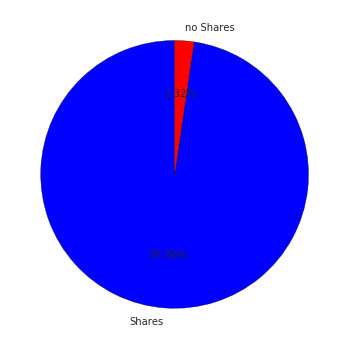

fid 1448357445384692
total post 969
shares of posts 672
ratio shares/total 0.693498452012 

1448357445384692 粉絲頁發文有文分享比例圓餅圖:


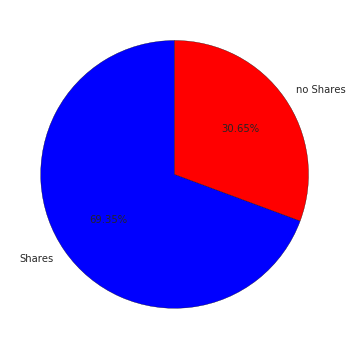

fid 179080912217031
total post 664
shares of posts 610
ratio shares/total 0.918674698795 

179080912217031 粉絲頁發文有文分享比例圓餅圖:


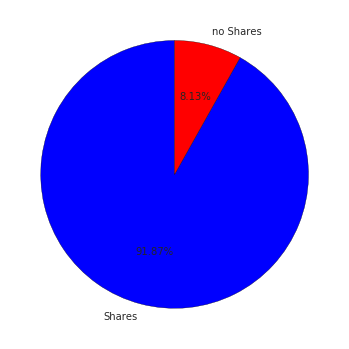

In [119]:
#assign the facebook fans page that you prefered
fids=['139624776093433','1448357445384692','179080912217031']
host = '192.168.1.107:9200'
#elasticsearch repository provided by this course
fidpost(fids,host)

# Step 3 紛絲頁全部文章Comment的箱型圖


In [209]:
def boxPlotFBFansPageComp(fids,host,pngFilePath,outlierFilter,lower_bound, upper_bound):
    data=[]
    for fid in fids:
        conn = pyes.es.ES(host)
        tq = pyes.query.TermQuery(field="fid", value=fid)
        tagg = pyes.aggs.TermsAgg('pid', field= 'fid_pid')
        qsearch = pyes.query.Search(tq) 
        qsearch.agg.add(tagg) 
        result = conn.search(query=qsearch , indices='facebook_nested' , doc_types='comment')
        #print json.dumps(result.aggs,indent=2)
        for fidpid_summary in result.aggs["pid"]["buckets"]:
            #print fidpid_summary["key"] + ',' + str(fidpid_summary["doc_count"])
            #if fidpid_summary["doc_count"] < outlierFilter or outlierFilter < 0:
            data.append([fidpid_summary["doc_count"],fid,fidpid_summary["key"]])

    df=pd.DataFrame(data,columns={'count','fid','fidpid'})
    sns.set(style="ticks")
    sns_plot=sns.boxplot(x="fid", y="count", data=df, palette="PRGn")
    fig=sns_plot.get_figure()
    plt.ylim(lower_bound, upper_bound)
    fig.savefig(pngFilePath)
    return df

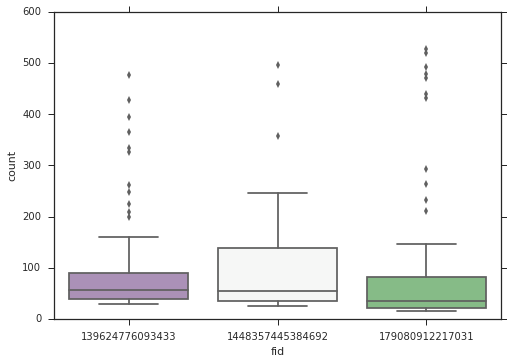

In [216]:
#assign the facebook fans page that you prefered
fids=['139624776093433','1448357445384692','179080912217031']

#elasticsearch repository provided by this course
host = '192.168.1.107:9200'

#output box plot PNG figure
pngFilePath="output.png"

#outlier threshold you want to filter (if you give minus ONE, none of outlier is filtered.)
outlierFilter=2000
lower_bound = 0
upper_bound = 600
#obtain the result and save as "pngFilePath" given from you
df=boxPlotFBFansPageComp(fids,host,pngFilePath,outlierFilter,lower_bound, upper_bound)

# Step 4: 紛絲頁每個月文章Comment的箱型圖

In [234]:
import pyes
import json
import pandas as pd
import seaborn as sns
import datetime
import matplotlib.pyplot as plt


def boxPlotNumofPostPerMonth(fid,host,lowerbound,upperbound,pngFilePath):
    conn = pyes.es.ES(host)
    tq = pyes.query.TermQuery(field="fid", value=fid)
    #tagg = pyes.aggs.TermsAgg('pid', field= 'fid_pid')
    DHAgg = pyes.aggs.DateHistogramAgg('month' ,field='created_time', interval='month',sub_aggs=[])
    tagg = pyes.aggs.TermsAgg('pid', field= 'fid_pid')
    DHAgg.sub_aggs.append(tagg) 
    qsearch = pyes.query.Search(tq) 
    qsearch.agg.add(DHAgg) 
    result = conn.search(query=qsearch , indices='facebook_nested' , doc_types='comment')
    data=[]
    month=[]
    
    for r in result.aggs["month"]["buckets"]:
        for pid in r["pid"]["buckets"]:
            monthyear=datetime.datetime.strptime(r["key_as_string"], "%Y-%m-%dT%H:%M:%S.%fZ").strftime('%Y/%m')
            if monthyear not in month:
                month.append(monthyear)
            data.append([pid["doc_count"],monthyear,pid["key"],r["key"]])
    df=pd.DataFrame(data,columns={'date','count','fid','pid'})
    for c in month:
        df1=df[df['date']==c]
        print c,'max:',df1['count'].max(),'min:',df1['count'].min(),'mean:',df1['count'].mean()
    sns.set(style="ticks")
    sns_plot=sns.boxplot(x="date", y="count", data=df, palette="PRGn")
    fig=sns_plot.get_figure()
    plt.ylim(lower_bound, upper_bound)
    fig.savefig(pngFilePath)

2013/01 max: 121 min: 1 mean: 10.8148148148
2013/02 max: 148 min: 1 mean: 12.1052631579
2013/03 max: 124 min: 1 mean: 10.6206896552
2013/04 max: 247 min: 1 mean: 16.1707317073
2013/05 max: 183 min: 1 mean: 14.2121212121
2013/06 max: 17 min: 1 mean: 6.37837837838
2013/07 max: 200 min: 1 mean: 15.3846153846
2013/08 max: 333 min: 1 mean: 22.756097561
2013/09 max: 84 min: 1 mean: 12.5526315789
2013/10 max: 58 min: 1 mean: 8.61290322581
2013/11 max: 30 min: 1 mean: 7.61538461538
2013/12 max: 10 min: 1 mean: 3.31034482759
2014/01 max: 17 min: 1 mean: 3.77272727273
2014/02 max: 75 min: 1 mean: 8.75
2014/03 max: 41 min: 1 mean: 4.4347826087
2014/04 max: 19 min: 1 mean: 5.32
2014/05 max: 60 min: 1 mean: 11.90625
2014/06 max: 57 min: 1 mean: 5.96666666667
2014/07 max: 83 min: 1 mean: 14.0344827586
2014/08 max: 117 min: 1 mean: 16.3428571429
2014/09 max: 55 min: 1 mean: 7.25
2014/10 max: 392 min: 1 mean: 28.0256410256
2014/11 max: 463 min: 1 mean: 22.3333333333
2014/12 max: 259 min: 1 mean: 16.87

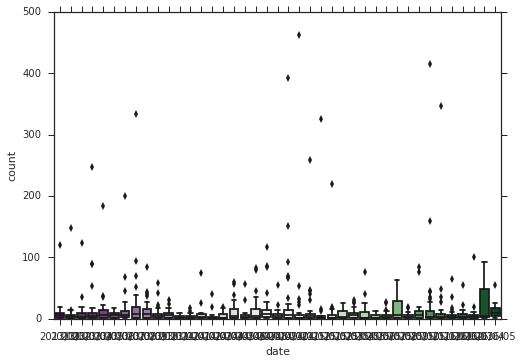

In [235]:
host = '192.168.1.107:9200'
lower_bound = 0
upper_bound = 500
fid="139624776093433"
pngFilePath="output3.png"
boxPlotNumofPostPerMonth(fid,host,lower_bound,upper_bound,pngFilePath)

2013/12 max: 12 min: 1 mean: 4.625
2014/01 max: 974 min: 1 mean: 46.511627907
2014/02 max: 628 min: 1 mean: 21.9423076923
2014/03 max: 154 min: 1 mean: 9.58620689655
2014/04 max: 15 min: 1 mean: 3.625
2014/05 max: 91 min: 1 mean: 12.36
2014/06 max: 616 min: 1 mean: 39.5151515152
2014/07 max: 65 min: 1 mean: 6.42222222222
2014/08 max: 17 min: 1 mean: 5.9
2014/09 max: 131 min: 1 mean: 14.9833333333
2014/10 max: 328 min: 1 mean: 16.9791666667
2014/11 max: 475 min: 1 mean: 23.3928571429
2014/12 max: 79 min: 1 mean: 5.75
2015/01 max: 154 min: 1 mean: 17.4782608696
2015/02 max: 1291 min: 1 mean: 131.964285714
2015/03 max: 6 min: 1 mean: 3.11764705882
2015/04 max: 20 min: 1 mean: 4.10526315789
2015/05 max: 138 min: 1 mean: 12.0909090909
2015/06 max: 2077 min: 1 mean: 52.358490566
2015/07 max: 177 min: 1 mean: 18.1388888889
2015/08 max: 1835 min: 1 mean: 75.4893617021
2015/09 max: 95 min: 1 mean: 6.94117647059
2015/10 max: 89 min: 1 mean: 9.53125
2015/11 max: 235 min: 1 mean: 26.5652173913
201

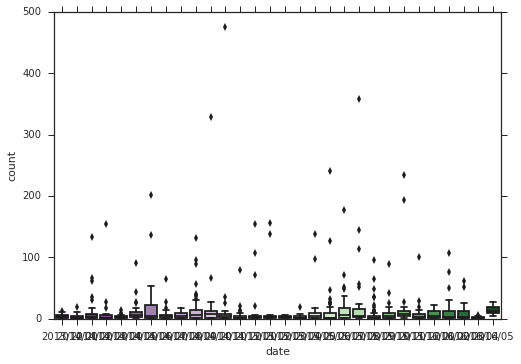

In [219]:
host = '192.168.1.107:9200'
lower_bound = 0
upper_bound = 500
fid="1448357445384692"
pngFilePath="output4.png"
boxPlotNumofPostPerMonth(fid,host,lower_bound,upper_bound,pngFilePath)

2013/01 max: 13 min: 1 mean: 3.83333333333
2013/02 max: 20 min: 1 mean: 3.90909090909
2013/03 max: 3 min: 1 mean: 2.0
2013/04 max: 104 min: 1 mean: 15.6428571429
2013/05 max: 9 min: 1 mean: 2.83333333333
2013/06 max: 862 min: 1 mean: 56.5882352941
2013/07 max: 42 min: 1 mean: 6.81818181818
2013/08 max: 78 min: 1 mean: 10.3333333333
2013/09 max: 89 min: 1 mean: 15.6296296296
2013/10 max: 71 min: 1 mean: 6.4
2013/11 max: 41 min: 1 mean: 6.11764705882
2013/12 max: 75 min: 1 mean: 13.8
2014/01 max: 50 min: 1 mean: 5.86363636364
2014/02 max: 39 min: 1 mean: 7.42857142857
2014/03 max: 228 min: 1 mean: 23.5263157895
2014/04 max: 429 min: 1 mean: 34.6470588235
2014/05 max: 64 min: 1 mean: 10.0
2014/06 max: 71 min: 1 mean: 13.9285714286
2014/07 max: 212 min: 1 mean: 26.0
2014/08 max: 39 min: 1 mean: 11.0666666667
2014/09 max: 146 min: 1 mean: 26.4210526316
2014/10 max: 1535 min: 1 mean: 105.333333333
2014/11 max: 5 min: 1 mean: 2.375
2014/12 max: 58 min: 1 mean: 16.0
2015/01 max: 2363 min: 1 me

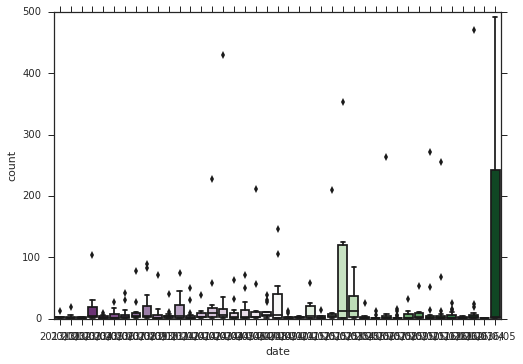

In [220]:
host = '192.168.1.107:9200'
lower_bound = 0
upper_bound = 500
fid="179080912217031"
pngFilePath="output5.png"
boxPlotNumofPostPerMonth(fid,host,lower_bound,upper_bound,pngFilePath)

# Step 5 Get User-Post frequence matrix
## input {es address, row name, column name, fans page ID}

In [221]:
import pyes
import json

def getUserPostFreqMatrix(es_address,row,column,fid):
    rc=200
    cc=200
    
    rowIndexList,colIndexList,matrix = [],[],[]
    conn=pyes.es.ES(es_address)
    tq = pyes.query.TermQuery(field="fid", value=fid)

    tagg = pyes.aggs.TermsAgg(row, field= row, sub_aggs=[]) 
    tagg1 = pyes.aggs.TermsAgg(column, field= column)  
    tagg.sub_aggs.append(tagg1) 

    qsearch = pyes.query.Search(tq) 
    qsearch.agg.add(tagg)

    rs = conn.search(query=qsearch, indices='facebook_nested' ,type="comment" )
    
    rowcount=0
    colcount=0
    for user in rs.aggs[row]['buckets']:
        if user['key']!="" and user['key'] not in rowIndexList and rowcount<rc:
            rowIndexList.append(user['key'])
            rowcount=rowcount+1

        for post in user[column]['buckets']:
            if post['key'] not in colIndexList and colcount<cc:
                colIndexList.append(post['key'])
                colcount=colcount+1

    for i in range(0,len(rowIndexList)):
        matrix.append([0.0]*len(colIndexList))

    for user in rs.aggs[row]['buckets']:
        if user["key"] in rowIndexList:
            for post in user[column]['buckets']:
                if post['key'] in colIndexList:
                    matrix[rowIndexList.index(user['key'])][colIndexList.index(post['key'])]= float(post['doc_count'])
    
    
    return {"data":matrix,"col":colIndexList,"row":rowIndexList}

# Step 6: Please assign specified Facebook fan page and parameters

In [224]:
def usertouser(result):
    from string import letters
    import numpy as np
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt

    sns.set(style="white")

    # Generate a large random dataset
    d = pd.DataFrame(data=result["data"],
                     columns=result["col"])

    # Compute the correlation matrix
    corr = d.corr()

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(20, 10))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
                square=True, xticklabels=5, yticklabels=5,
                linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

In [230]:
es_address="192.168.1.107:9200"
row="from.id"
column="fid_pid"
fid="139624776093433"
result = getUserPostFreqMatrix(es_address,row,column,fid)

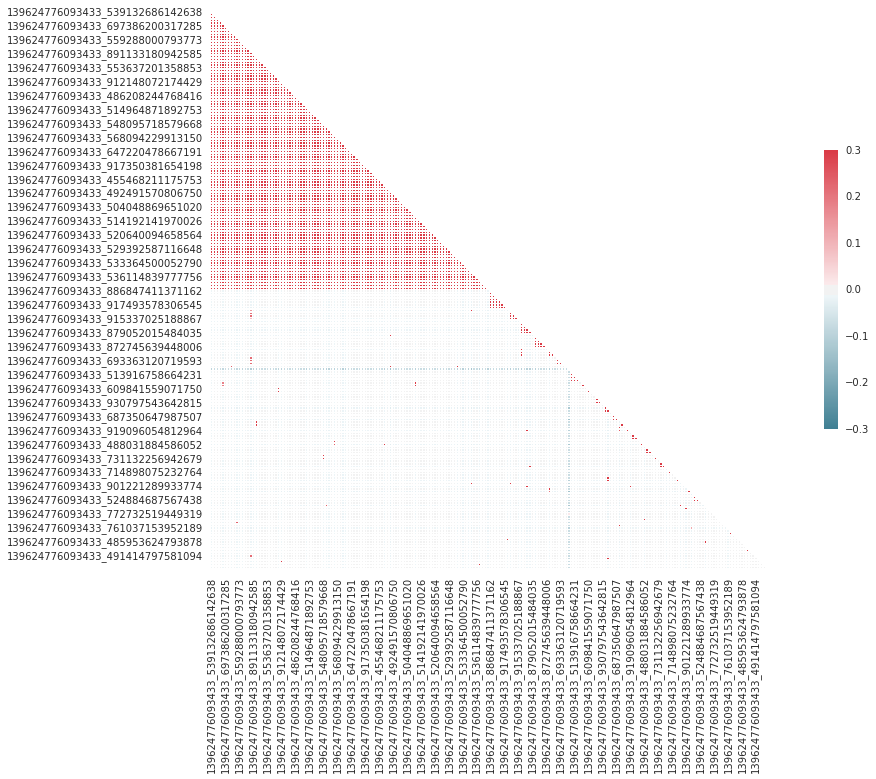

In [231]:
usertouser(result)

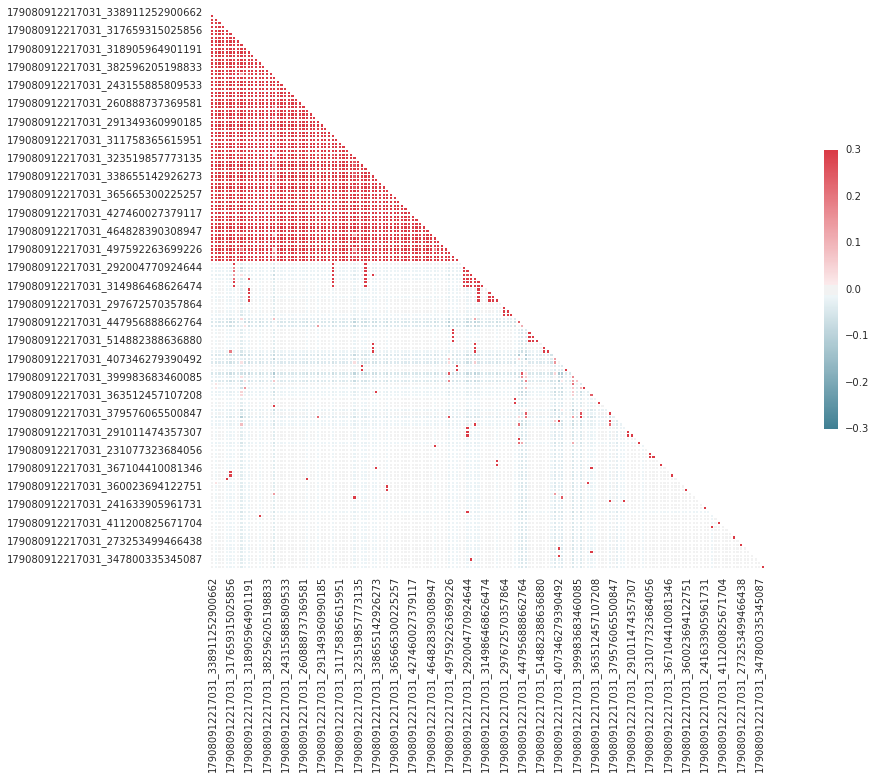

In [225]:
es_address="192.168.1.107:9200"
row="from.id"
column="fid_pid"
fid="179080912217031"
result = getUserPostFreqMatrix(es_address,row,column,fid)
usertouser(result)

In [228]:
es_address="192.168.1.107:9200"
row="from.id"
column="fid_pid"
fid="1448357445384692"
result = getUserPostFreqMatrix(es_address,row,column,fid)

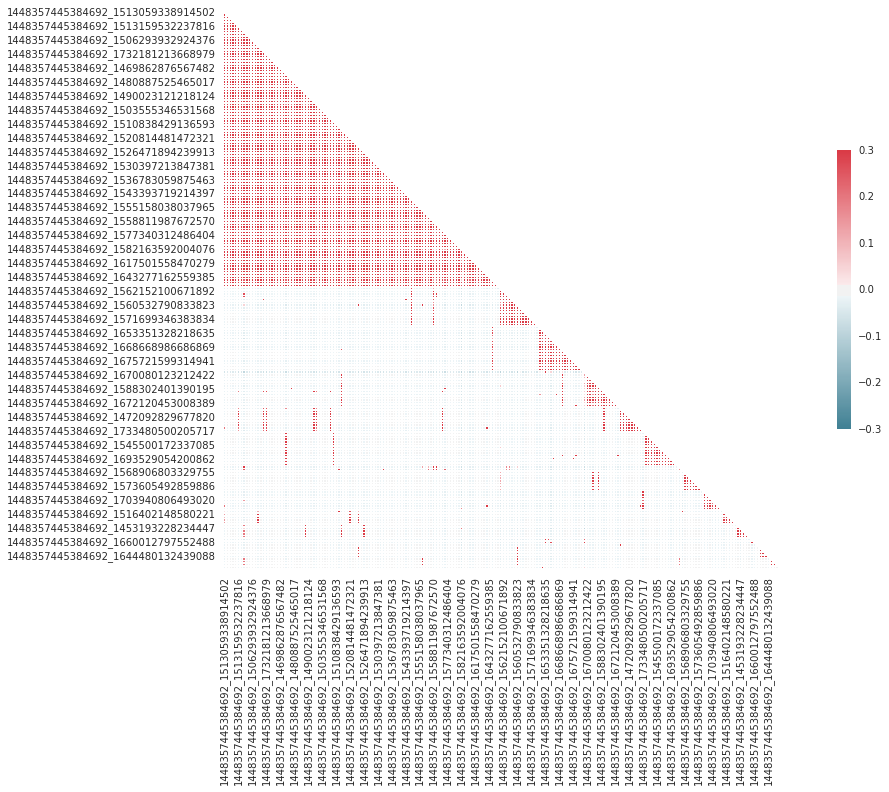

In [229]:
usertouser(result)

In [125]:
result["row"]

[u'179080912217031',
 u'1655505514666123',
 u'10153741872811544',
 u'1027918497274236',
 u'955696997817300',
 u'10153256288662109',
 u'1055462351141513',
 u'943725072377017',
 u'10205610984977052',
 u'1025988804111699',
 u'1090674304297320',
 u'1113163608693764',
 u'1184211981592249',
 u'1540721192906525',
 u'1785051091722359',
 u'752161484887739',
 u'1007362259325129',
 u'10153809022717673',
 u'10202738676748214',
 u'10203712467050572',
 u'10204452717832798',
 u'10205631096884542',
 u'10206565919001103',
 u'1043882778958659',
 u'1058282620888469',
 u'1058441804205988',
 u'1067094173307756',
 u'1089057411112976',
 u'1094705687282181',
 u'1106150109404518',
 u'1113858418632866',
 u'1114114255273708',
 u'1122275101150475',
 u'1125993254086194',
 u'1140397995985428',
 u'1153087938048593',
 u'1175811785770248',
 u'1184040154956807',
 u'1185993368080956',
 u'1193000167396409',
 u'1198979110119536',
 u'1202284076453264',
 u'1221600931190332',
 u'1269425686408360',
 u'1521209138172984',
 u'15